In [87]:
import json
 
# Opening JSON file
f = open('ultimate_data_challenge.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

 
# Closing file
f.close()

In [88]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create Table

In [89]:
#investigate extracted data
type(data)

list

In [90]:
data[0].items()

dict_items([('city', "King's Landing"), ('trips_in_first_30_days', 4), ('signup_date', '2014-01-25'), ('avg_rating_of_driver', 4.7), ('avg_surge', 1.1), ('last_trip_date', '2014-06-17'), ('phone', 'iPhone'), ('surge_pct', 15.4), ('ultimate_black_user', True), ('weekday_pct', 46.2), ('avg_dist', 3.67), ('avg_rating_by_driver', 5.0)])

In [91]:
#create empty table to add values to
table_data = []

In [92]:
#iterate through each dictionary in the extracted data and add all the values in the key, value pairs into a single list
for dictionary in data:
    for k, v in dictionary.items():
        table_data.append(v)

In [93]:
#from the master list of all the values extract every twelth item to isolate the values for each future column of the dataframe
city = table_data[::12]

In [94]:
trips_in_first_30_days = table_data[1::12]

In [95]:
signup_date = table_data[2::12]

In [96]:
avg_rating_of_driver = table_data[3::12]

In [97]:
avg_surge = table_data[4::12]

In [98]:
last_trip_date = table_data[5::12]

In [99]:
phone = table_data[6::12]

In [100]:
surge_pct = table_data[7::12]

In [101]:
ultimate_black_user = table_data[8::12]

In [102]:
weekday_pct = table_data[9::12]

In [103]:
avg_dist = table_data[10::12]

In [104]:
avg_rating_by_driver = table_data[11::12]

In [105]:
#create empty list to store column names
columns= []

In [106]:
#append column names - i.e. the keys in each key, value pair- into a list
for k, v in data[0].items():
    columns.append(k)

In [107]:
#The original idea was to use pd.DataFrame(columns= columns), but instead I printed this list and extracted the column names
columns

['city',
 'trips_in_first_30_days',
 'signup_date',
 'avg_rating_of_driver',
 'avg_surge',
 'last_trip_date',
 'phone',
 'surge_pct',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [108]:
#create pandas dataframe for data analysis
df = pd.DataFrame({'city' : city,
                 'trips_in_first_30_days': trips_in_first_30_days,
                  'signup_date': signup_date,
                  'avg_rating_of_driver': avg_rating_of_driver,
                  'avg_surge': avg_surge,
                  'last_trip_date': last_trip_date,
                  'phone':phone,
                  'surge_pct':surge_pct,
                  'ultimate_black_user':ultimate_black_user,
                  'weekday_pct':weekday_pct,
                  'avg_dist':avg_dist,
                  'avg_rating_by_driver':avg_rating_by_driver})

In [109]:
df.to_csv('../ultimate_challenge/clean_data.csv', index= False)

In [110]:
df['avg_rating_of_driver'].unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

## EDA

In [111]:
#ensure dataframe was created properly
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [112]:
#begin EDA
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [113]:
df.info

<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2   

In [114]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

## Data Cleaning

In [115]:
null_driver_rating = df[df['avg_rating_of_driver'].isnull()]

In [116]:
null_driver_rating.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,8122.000000,0.0,8122.000000,8122.000000,8122.000000,8122.000000,8055.000000
mean,0.593327,NaN,1.078210,8.548067,59.050948,7.506267,4.785984
std,0.606755,NaN,0.310306,26.578461,46.859739,7.758616,0.622122
min,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,NaN,1.000000,0.000000,0.000000,2.410000,5.000000
50%,1.000000,NaN,1.000000,0.000000,100.000000,4.715000,5.000000
75%,1.000000,NaN,1.000000,0.000000,100.000000,10.720000,5.000000
max,5.000000,NaN,5.000000,100.000000,100.000000,160.960000,5.000000


In [117]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [118]:
df[df['avg_rating_of_driver']== 5.0].count()

city                      20771
trips_in_first_30_days    20771
signup_date               20771
avg_rating_of_driver      20771
avg_surge                 20771
last_trip_date            20771
phone                     20625
surge_pct                 20771
ultimate_black_user       20771
weekday_pct               20771
avg_dist                  20771
avg_rating_by_driver      20674
dtype: int64

There are 8122 missing values for avg_rating_of_driver. Displayed above are the statistics of the whole dataset and the statistics for columns where avg_rating_of_driver are missing. The two sets are very similar aside from the number of trips in the first 30 days, which is noticeably lower, and the avg_dist which is slightly lower among the dataset with the missing values.

I would also guess that drivers who were exceptionally good or exceptionally bad would be more likely to elicit reviews from drivers.

Given that, 1. I take the riders who did not rate their driver to be similar to the larger population in the dataset aside from using the service less frequently, for slightly shorter distances and 2. missing ratings are more likely to fall in the middle of the spectrum, I believe we can safely fill in null values with either the mean, median or mode.

My first inclination was the mode, since I'm assuming these riders to be generally similar to other ones. However, the mode is 5.0. I have already stated that I find it more likely that the best drivers would be less likely to get a rating, and while about 25% of the data does fall into this category, it seems unreasonable to lump all 8,122 missing values into the highest possible rating.

The mean is 4.6 which seems like a good candidate at first glance. However, the median is 4.9, meaning most drivers fall in the 4.9-5.0 range. The lower mean is likely the result of a relative few disgruntled riders who give their drivers extremely low ratings.

Therefore, I believe the median to be the most reasonable fill for the missing values.

In [119]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace=True)

In [120]:
#Examine the rating by driver column
df['avg_rating_by_driver'].mean()

4.778158195947439

In [121]:
df['avg_rating_by_driver'].median()

5.0

In [122]:
df['avg_rating_by_driver'].value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

The column avg_rating_by_driver has a median of 5.0 and a mean of 4.8. Because I assume similar assumptions hold, namely, that exceptionally good or poor riders would be more likely to elicit a rating. Therefore, in this case I will fill the null values in this column with the mean instead of the median.

In [123]:
#fill rating by driver with mean value of the column
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace= True)

In [124]:
df['last_trip_date'].max()

'2014-07-01'

In [125]:
df['last_trip_date'].min()

'2014-01-01'

In [126]:
print(f"'Phones count for all users' {df['phone'].value_counts()}")
print(f"'Phones of those who rode in the last month ' {df['phone'][df['last_trip_date'] >= '2014-06-01'].value_counts()}")


'Phones count for all users' iPhone     34582
Android    15022
Name: phone, dtype: int64
'Phones of those who rode in the last month ' iPhone     15525
Android     3146
Name: phone, dtype: int64


Since the proportions of iPhone/Android differ among all users and those in the last month, I do not want to initially assume that phone type is arbitrary. Perhaps one has a better interface with the application, for example.

I would ideally like to ask those who know about the data collection processif the missing values might all be tied to one phone type. However, without access to this information, I am going to assume that the values present are roughly proportional to the missing values and fill accordingly.

In [127]:
#Caculate phone type percentages
phone_total = 34582 + 15022
android_perc = 15022/ phone_total
iPhone_perc = 34582/ phone_total

In [128]:
#fill missing phone values proportionally to the non-missing values
df['phone'] = df['phone'].fillna(pd.Series(np.random.choice(['Android', 'iPhone'], 
                                                      p=[android_perc, iPhone_perc], size=len(df))))

In [129]:
#Ensure we no longer have any missing values
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Feature Engineering

In [130]:
#Convert columns with dates to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [131]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [132]:
#Ultimate wants to know if a new customer will be active 6 months later.
#To start to classify into those that were and those that were not active 6 months later, create columns that indicate how long the rider has been active and inactive
#Then convert the timedelta to integers
df['days_active'] = df['last_trip_date'] - df['signup_date']

In [133]:
df['days_active']= df['days_active'].dt.days

In [134]:
df['days_inactive'] = df['last_trip_date'].max() - df['last_trip_date']

In [135]:
df['days_inactive'].head(10)

0    14 days
1    57 days
2   175 days
3     2 days
4   108 days
5    25 days
6   157 days
7   153 days
8   150 days
9   177 days
Name: days_inactive, dtype: timedelta64[ns]

In [136]:
df['days_inactive']= df['days_inactive'].dt.days

Text(0, 0.5, 'Value Counts')

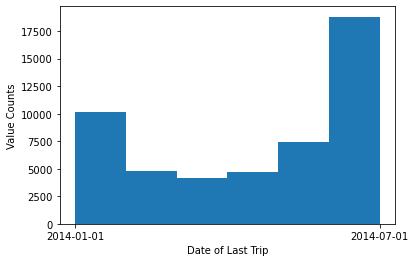

In [137]:
#Visualization of spread of last trip date binned by month
plt.hist(df['last_trip_date'], bins = 6)
plt.xticks([df['last_trip_date'].min(), df['last_trip_date'].max()], visible=True, rotation="horizontal")
plt.xlabel('Date of Last Trip')
plt.ylabel('Value Counts')

Text(0, 0.5, 'Value Counts')

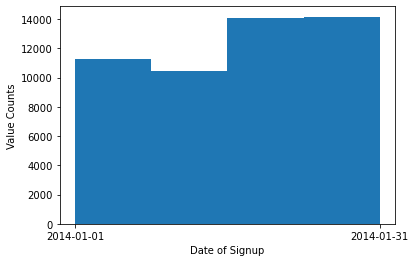

In [138]:
#Visualization of signup date
plt.hist(df['signup_date'], bins = 4)
plt.xticks([df['signup_date'].min(), df['signup_date'].max()], visible=True, rotation="horizontal")
plt.xlabel('Date of Signup')
plt.ylabel('Value Counts')

(array([11381.,  2404.,  2383.,  2705.,  2632.,  3266.,  4170.,  5864.,
         9638.,  5557.]),
 array([  0. ,  18.1,  36.2,  54.3,  72.4,  90.5, 108.6, 126.7, 144.8,
        162.9, 181. ]),
 <BarContainer object of 10 artists>)

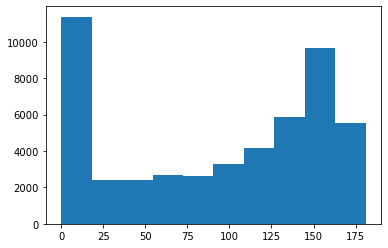

In [139]:
plt.hist(df['days_active'])

In [146]:
#set up our y variable - will the rider still be active in their sixth month
df['Sixth_Month_User'] = np.where(df['days_inactive'] <= 30, 1.0, 0.0)

Ultimate considers user 'active' if they have taken a ride in the last 30 days.

In [147]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,days_inactive,Sixth_Month_User
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,57,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,175,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,0.0


## Convert DF to Numeric

In [148]:
numeric_df = df.copy(deep=True)

In [149]:
numeric_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,days_inactive,Sixth_Month_User
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,57,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,175,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,0.0


In [150]:
numeric_df['city'].replace(to_replace = "King's Landing", value = 1, inplace = True)
numeric_df['city'].replace(to_replace = "Astapor", value = 2, inplace = True)
numeric_df['city'].replace(to_replace = "Winterfell", value = 3, inplace = True)
numeric_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,days_inactive,Sixth_Month_User
0,1,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,1.0
1,2,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,57,0.0
2,2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,175,0.0
3,1,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,1.0
4,3,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,0.0


In [151]:
numeric_df['phone'].replace(to_replace = "iPhone", value = 1, inplace = True)
numeric_df['phone'].replace(to_replace = "Android", value = 2, inplace = True)
numeric_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,days_inactive,Sixth_Month_User
0,1,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,True,46.2,3.67,5.0,143,14,1.0
1,2,0,2014-01-29,5.0,1.00,2014-05-05,2,0.0,False,50.0,8.26,5.0,96,57,0.0
2,2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,False,100.0,0.77,5.0,1,175,0.0
3,1,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,True,80.0,2.36,4.9,170,2,1.0
4,3,14,2014-01-27,4.4,1.19,2014-03-15,2,11.8,False,82.4,3.13,4.9,47,108,0.0


In [152]:
numeric_df.to_csv('../ultimate_challenge/clean_df.csv', index= False)